<center><h1>Project 1: Financial Calculators</h1></center>

Authors: Muhammad Haris Iqbal and Minh Dang 

10/15/2021

## Introduction
In this project, we will implement three calculators to help someone plan for their financial future. The main idea behind these calculators is using for-loops/while-loops to calculate the time it takes to pay off the loan or the final balance in an account.

## Part 1: How long will it take to repay my college loans?

The first calculator will compare the amount of time it takes to repay student loans with two different monthly payment amounts. Our calculator will prompt a user to enter the following parameters: 
- the student loan balance at the time repayment begins 
- the nominal annual interest rate (the monthly rate times twelve)
- two monthly payments method

In this calculator there are three functions. The first function is `comparePayoffs(amount, rate, monthly1, monthly2)` that computes the number of months required to pay off the loan with each monthly payment method. The interest on the loan balance should compound monthly at a rate of $rate\,/\,100\,/\,12$. This function will print the length of both repayment periods and how much sooner the loan will be paid off if the higher monthly payment. Then it will plot the loan balances, with each payment amount, over time until both balances reach zero.  

Firstly, we initialize the `time1` and `time2` variables to keep track of the number of months required to pay off the loan and convert the annual interest rate into the monthly interest rate. Then, we initialize `amount1`and `amount2` variables with the initial amount. Futher, we also initialize the `monthList1`, `amountList1`, `monthList2`, and `amountList2` variables which are then used to plot the graph of loan balances over time until both balances reach zero. 

Then, we use two while-loops which continues to iterate until both `amount1` and `amount2` reach zero. In the loop both `amount1` and `amount2` compounds at a rate of `monthRate` and then a `monthly1` and `monthly2` amount is respectively subtracted from `amount1` and `amount2`. Then, we increment both `time1` and `time2` by one to show that a month has past. 

Finally, we add `amount1`, `time1` respectively into `amountList1`, `monthList1` and `amount2`, `time2` respectively into `amountList2`, `monthList2`. For accurate calculation of data, we converted time to pay off loans as months and used floor division to covert the time into the whole number of years and remainder division to get the number of months.  

Initial balance: 60000
Nominal annual percentage rate: 5
Monthly payment 1: 500
Monthly payment 2: 750
If you pay $500 per month, the repayment period will be 13 years and 11 months.
If you pay $750 per month, the repayment period will be 8 years and 2 months.
If you pay $250 more per month, you will repay the loan 5 years and 9 months ealirer.


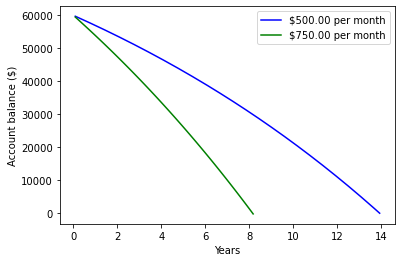

In [4]:
import matplotlib.pyplot as pyplot

def comparePayoffs(amount, rate, monthly1, monthly2):
    '''
    Computes the time to pay off the loan
    Parameters: the loan balance, annual interest rate, two monthly payment amounts
    Return values: None
    '''
    time1 = 0
    time2 = 0
    monthRate = rate / (100*12)
    amount1 = amount
    amount2 = amount
    monthList1 = []
    amountList1 = []
    monthList2 = []
    amountList2 = []
    
    while amount1 > 0:
        amount1 += amount1*monthRate
        amount1 -= monthly1
        time1 += 1
        amountList1.append(amount1)
        monthList1.append(time1 / 12)
        
    while amount2 > 0:
        amount2 += amount2*monthRate
        amount2 -= monthly2
        time2 += 1
        amountList2.append(amount2)
        monthList2.append(time2 / 12)
        
    print(f"If you pay ${monthly1} per month, the repayment period will be {time1 // 12} years and {time1 % 12} months.")
    print(f"If you pay ${monthly2} per month, the repayment period will be {time2 // 12} years and {time2 % 12} months.")
    
    timediff = abs(time1 - time2)
    print(f"If you pay ${abs(monthly1 - monthly2)} more per month, you will repay the loan {timediff // 12} years and {timediff % 12 } months ealirer.")
        
    pyplot.plot(monthList1, amountList1, color = "blue", label = f"${monthly1:.2f} per month")
    pyplot.plot(monthList2, amountList2, color = "green", label = f"${monthly2:.2f} per month")
    pyplot.xlabel("Years")
    pyplot.ylabel("Account balance ($)")
    pyplot.legend()
    pyplot.show()
    
    
def main():
    amount = float(input("Initial balance: "))
    rate = float(input("Nominal annual percentage rate: "))
    monthly1 = int(input("Monthly payment 1: "))
    monthly2 = int(input("Monthly payment 2: "))
    comparePayoffs(amount, rate, monthly1, monthly2)

main()

Our calculator is ready to be tested.

**Question 4.2.1** *How long would it take to pay off $20,000 in student loans with a 4% interest rate if you paid $100 per month? Approximately how much would you have to pay per month to pay off the loan in ten years?*

For this question, we use another function `timeToPay(amount, rate, monthly)`.



If you pay $100 per month, the repayment period will be 27 years and 7 months.


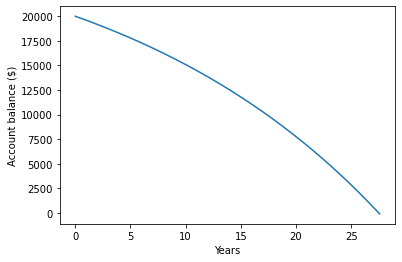

If you pay $202.5 per month, the repayment period will be 10 years and 0 months.


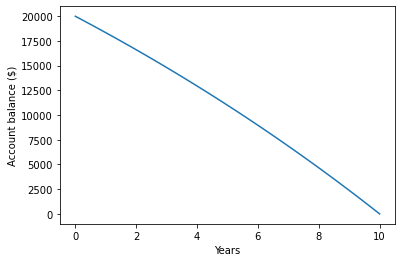

In [3]:
def timeToPay(amount, rate, monthly):
    '''
    Computes the time to pay off the loan
    Parameters: the loan balance, annual interest rate, monthly payment amount
    Return values: None
    '''
    time = 0
    monthRate = rate / (100*12)
    monthList = [time]
    amountList = [amount]
    while amount > 0:
        amount += amount*monthRate
        amount -= monthly
        time += 1
        monthList.append(time / 12)
        amountList.append(amount)
    print(f"If you pay ${monthly} per month, the repayment period will be {time // 12} years and {time % 12} months.")
    
    pyplot.plot(monthList, amountList)
    
    pyplot.xlabel("Years")
    pyplot.ylabel("Account balance ($)")
    pyplot.show()
    
timeToPay(20000, 4, 100)
timeToPay(20000, 4, 202.5)

If we pay \\\$100 per month, it will take 27 years and 7 months to pay off the loan. If we need to pay the loan in ten years, then we will need to pay a little more than $200 per month.

**Question 4.2.2** *If you run your program to determine how long it would take to pay off the same loan if you paid only \$50 per month, you should encounter a problem. What is it?*

With only \\\$50 per month the program will not be exceuted because an infinite loop will be created. If we calculate the amount that our loan compounds in first month it is $20000.\frac{4}{100.12} \approx  $66.67 ($) which is bigger than \\\$50. The program will not be able to run as the value of current loan continues to increase and gets to a point where loan never gets zero. Hence, we cannot end the while-loop this way. 

## Part 2: How much will I have for retirement?

The second calculator will compare the retirement nest eggs that result from making two different monthly investments in a retirement fund. This calculator will prompt a user to enter the following inputs:

- the initial balance in the retirement account
- the current age of the investor
- the desired retirement age of the investor
- the expected nominal annual rate of return on the investment
- two monthly investment amounts

This calculator has three functions. The first function is `compareInvestments(balance, age, retireAge, rate, monthly1, monthly2)` that computes the final balance in the retirement account, for each monthly investment, when the investor reaches his or her retirement age. The interest on the current balance compounds monthly at a rate of $rate\,/\,100\,/\,12$.  The function also plots the growth of the retirement account balance for both monthly investment amounts, and then prints the two final balances along with the additional amount that results from the higher monthly investment.

Firstly, we initialize `age1` and `age2` variables and convert the age in years into age in months. Then, we convert the annual interest rate to monthly interest rate. We also initialize `balance1` and `balance2` variables with the initial balance. Then, we initialize the `balanceList1`, `ageList1`, `balanceList2`, `ageList2` variables, which are used to plot the graph of growing account balance against increasing age.

After that we initialize `retireAge`, which is the retirement age, and also covert it into months. Then, we use two while-loops which increases the amount in the retirement account until both `age1` and `age2` reach `retireAge`. In the loop both `balance1` and `balance2` compounds at a rate of `monthRate` and then a `monthly1` and `monthly2` amount is respectively added to `balance1` and `balance2`. Then, we increment both `age1` and `age2` by one to show that a month has past. 

Finally, we add `balance1`, `age1` respectively into `balanceList1`, `ageList1` and `balance2`, `age2` respectively into `balanceList2`, `ageList2`. The program is in a continual loop till both ages gets larger or equal to `retireAge`. 

Initial balance: 1000
Current age: 20
Retirement Age: 70
Nominal annual percentage rate of return: 4.2
Monthly investment 1: 100
Monthly investment 2: 150
The final balance from investing $100.00 per month: $212030.11
The final balance from investing $150.00 per month: $313977.02
If you invest $50.00 more per month, you will have $101946.91 more at retirement.


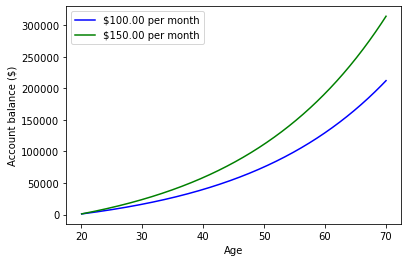

In [2]:
import matplotlib.pyplot as pyplot

def compareInvestments(balance, age, retireAge, rate, monthly1, monthly2):
    '''
    Calculates the final balance in the account of someone at his or her retirement age
    Parameter: initial balance, current age, retirement age, annual interest rate, two monthly investments
    Return values: None
    '''
    age1 = age*12
    age2 = age*12
    monthRate = rate / (100 * 12)
    balance1 = balance
    balance2 = balance
    balanceList1 = []
    ageList1 = []
    balanceList2 = []
    ageList2 = []
    
    retireAge = retireAge*12
    
    while age1 < retireAge:
        balance1 += balance1*monthRate
        balance1 += monthly1
        age1 += 1
        balanceList1.append(balance1)
        ageList1.append(age1 / 12)
        
    while age2 < retireAge:
        balance2 += balance2*monthRate
        balance2 += monthly2
        age2 += 1
        balanceList2.append(balance2)
        ageList2.append(age2 / 12) 
        
    print(f"The final balance from investing ${monthly1:.2f} per month: ${balance1:.2f}")
    print(f"The final balance from investing ${monthly2:.2f} per month: ${balance2:.2f}")
    print(f"If you invest ${abs(monthly1 - monthly2):.2f} more per month, you will have ${abs(balance1-balance2):.2f} more at retirement.")
    
    pyplot.plot(ageList1, balanceList1, color = "blue", label = f"${monthly1:.2f} per month")
    pyplot.plot(ageList2, balanceList2, color = "green", label = f"${monthly2:.2f} per month")
    pyplot.xlabel("Age")
    pyplot.ylabel("Account balance ($)")
    pyplot.legend()
    pyplot.show()
          
    
    
def main():
    balance = float(input("Initial balance: "))
    age = int(input("Current age: "))
    retireAge = int(input("Retirement Age: "))
    rate = float(input("Nominal annual percentage rate of return: "))
    monthly1 = int(input("Monthly investment 1: "))
    monthly2 = int(input("Monthly investment 2: "))
    compareInvestments(balance, age, retireAge, rate, monthly1, monthly2)

main()
    

**Question 4.2.3** *Suppose you are 30 and, after working for a few years, have managed to
save \\\$6,000 for retirement. If you continue to invest \\\$200 per month, how much will you
have when you retire at age 72 if your investment grows 3% per year? How much more will
you have if you invest \\\$50 more per month?*

For this question, we will use another function `calculateInvestments(balance, age, retireAge, rate, monthly)`.

The final balance from investing $200.00: $222709.90


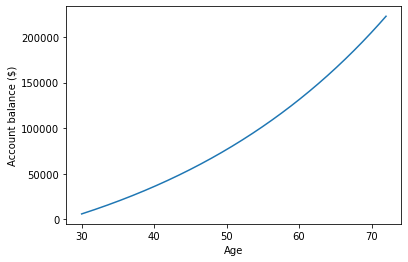

The final balance from investing $250.00: $273107.55


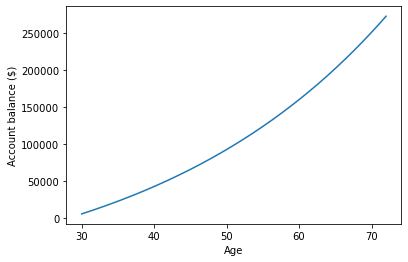

In [64]:
def calculateInvestments(balance, age, retireAge, rate, monthly):
    '''
    Calculates the final balance in the account of someone at his or her retirement age
    Parameter: initial balance, current age, retirement age, annual interest rate, monthly investment
    Return values: None
    '''
    monthRate = rate / (100 * 12)
    age = age*12
    retireAge = retireAge*12
    
    ageList = [age / 12]
    balanceList = [balance]
    
    while age < retireAge:
        balance += balance*monthRate
        balance += monthly
        age += 1
        balanceList.append(balance)
        ageList.append(age / 12)
        
    print(f"The final balance from investing ${monthly:.2f}: ${balance:.2f}")
    pyplot.plot(ageList, balanceList)
    
    pyplot.xlabel("Age")
    pyplot.ylabel("Account balance ($)")
    pyplot.show()

calculateInvestments(6000, 30, 72, 3, 200)
calculateInvestments(6000, 30, 72, 3, 250)

## Part 3: How long will my retirement savings last?

Our third calculator will initially perform the same computation as our previous calculator, but with only one monthly investment amount. After it calculates the final balance in the account, it will estimate how long that nest egg will last into retirement. Our calculator will need to prompt for the same values as above (but only one monthly investment amount) plus the percentage of the final balance the investor plans to withdraw in the first year after retirement. 

We will write a function `retirement(amount, age, retireAge, rate, monthly, percentWithdraw)` that adds the monthly investment to the balance in the retirement account until the investor reaches his or her retirement age, and then, after retirement age, withdraws a monthly amount. In the first month after retirement, this amount is one-twelfth of `percentWithdraw` of the current balance. For every month thereafter, the withdrawal amount will increase according to the rate of inflation, which is 3% annually. Every month, the interest on the current balance compounds at a rate of $rate\,/\,100\,/\,12$. The function will also plot the retirement account balance over time and then prints the age at which the retirement fund runs out.

Firstly, we use similar calculation which we used in second calculator with the exception that this time we only use one `age` variable. We use two while-loops in this function. The first while-loop perfroms the same function as it did in second calculator and iterates until `age` is equal or larger than `retireAge`. Then we initialize `withdraw` variable which calculates the amount withdrawn from the account in the first month after retirement. After that, we use the second while-loop which continues to run till the time our account balance has amount greater than 0. In this loop, the amount compunds at the rate of `monthRate`, and then the withdrawn amount is subtracted from the amount. Then, we increment `age` by one to show that a month has past. As there is a 3% annual rate of inflation, we increase our `withdraw` amount monthly at the rate of $\frac{0.03}{12}$.

Initial balance: 10000
Current age: 20
Retirement Age: 70
Nominal annual percentage rate of return: 4.2
Monthly investment: 100
Annual withdrawal % at retirement: 4


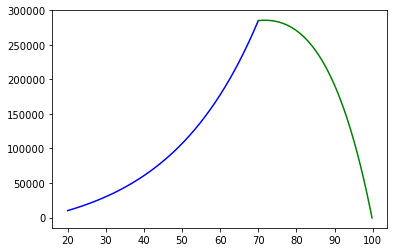

Your savings will last until you are 99 years and 10 months old.


In [5]:
import matplotlib.pyplot as pyplot

def retirement(amount, age, retireAge, rate, monthly, percentWithdraw):
    '''
    Plots the retirement account balance over time
    Parameters: initial balance, current age, retirement age, rate, 
    monthly investment, percentage of balance an investor withdraws
    Return value: None
    '''
    monthRate = rate / (100*12)
    age *= 12
    retireAge *= 12
    
    ageList = [age / 12]
    amountList = [amount]
    
    while age < retireAge:
        amount += amount*monthRate
        amount += monthly
        age += 1
        ageList.append(age / 12)
        amountList.append(amount)

    withdraw = amount * percentWithdraw / 100 / 12
    
    pyplot.plot(ageList, amountList, color = "blue")
    
    ageList = []
    amountList = []
    while amount > 0:
        amount += amount*monthRate
        amount -= withdraw
        age += 1
        withdraw += withdraw * (0.03/12)
        ageList.append(age / 12)
        amountList.append(amount)

        
    pyplot.plot(ageList, amountList, color = "green")
    pyplot.show()
    print(f"Your savings will last until you are {age // 12} years and {age % 12} months old.")


    
def main():
    amount = float(input("Initial balance: "))
    age = int(input("Current age: "))
    retireAge = int(input("Retirement Age: "))
    rate = float(input("Nominal annual percentage rate of return: "))
    monthly = float(input("Monthly investment: "))
    percentWithdraw = float(input(f"Annual withdrawal % at retirement: "))
    retirement(amount, age, retireAge, rate, monthly, percentWithdraw)


main()

**Question 4.2.4** *How long will your retirement savings last if you follow the plan outlined
in Question 4.2 (investing $200 per month) and withdraw 4% at retirement?*

For this question, we will use the `retirement(amount, age, retireAge, rate, monthly, percentWithdraw)` function with the following parameters:

- Initial balance: $amount = 6000$
- Current age: $age = 30$
- Retirement age: $retireAge = 72$ 
- The rate (%) at which the balance compounds annually: $rate = 3$
- Monthly investment: $monthly = 200$
- The percentage of the final balance an investor withdraws in the first month after retirement: $percentWithdraw = 4$

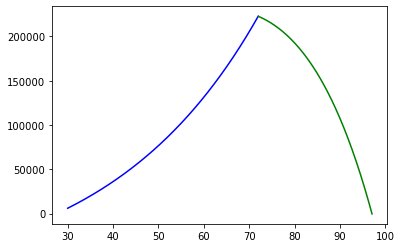

Your savings will last until you are 97 years and 1 months old.


In [8]:
import matplotlib.pyplot as pyplot

def retirement(amount, age, retireAge, rate, monthly, percentWithdraw):
    monthRate = rate / (100*12)
    '''
    Plots the retirement account balance over time
    Parameters: initial balance, current age, retirement age, annual rate,
    monthly investment, percentage of balance an investor withdraws
    Return value: None
    '''
    age *= 12
    retireAge *= 12
    
    ageList = [age / 12]
    amountList = [amount]
    
    while age < retireAge:
        amount += amount*monthRate
        amount += monthly
        age += 1
        ageList.append(age / 12)
        amountList.append(amount)

    withdraw = amount * percentWithdraw / 100 / 12
    
    pyplot.plot(ageList, amountList, color = "blue")
    
    ageList = []
    amountList = []
    while amount > 0:
        amount += amount*monthRate
        amount -= withdraw
        age += 1
        withdraw += withdraw * (0.03/12)
        ageList.append(age / 12)
        amountList.append(amount)

        
    pyplot.plot(ageList, amountList, color = "green")
    pyplot.show()
    print(f"Your savings will last until you are {age // 12} years and {age % 12} months old.")
    
retirement(6000, 30, 72, 3, 200, 4)